In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Read the dataset

In [44]:
train = pd.read_csv('used_cars_train_data.csv')
test = pd.read_csv('used_cars_test_data.csv')

In [45]:
print(train.shape)
print(test.shape)

(6019, 12)
(1234, 11)


In [46]:
train.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64

In [47]:
test.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               0
Engine               10
Power                10
Seats                11
dtype: int64

In [48]:
train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [49]:
test.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0


In [50]:
train['Engine'] = train['Engine'].str.replace(' CC','')
test['Engine'] = test['Engine'].str.replace(' CC','')

In [51]:
train['Engine'] = pd.to_numeric(train['Engine'])
test['Engine'] = pd.to_numeric(test['Engine'])

In [52]:
train['Power'] = train['Power'].str.replace(' bhp','')
test['Power'] = test['Power'].str.replace(' bhp','')

In [53]:
train['Power'].unique()

array(['58.16', '126.2', '88.7', '88.76', '140.8', '55.2', '63.1',
       '171.5', '103.6', '74', '103.25', '116.3', '187.7', '115',
       '175.56', '98.6', '83.8', '167.62', '190', '88.5', '177.01', '80',
       '67.1', '102', '108.45', '138.1', '184', '179.5', '103.5', '64',
       '82', '254.8', '73.9', '46.3', '37.5', '77', '82.9', '149.92',
       '138.03', '112.2', '163.7', '71', '105', '174.33', '75', '103.2',
       '53.3', '78.9', '147.6', '147.8', '68', '186', '170', '69', '140',
       '78', '194', '500', '108.5', '86.8', '187.74', 'null', '132',
       '86.7', '73.94', '117.3', '218', '168.5', '89.84', '110', '90',
       '82.85', '67', '241.4', '35', '270.9', '126.32', '73', '130',
       '100.6', '150', '75.94', '215', '107.3', '37.48', '120', '178',
       '152', '91.1', '85.80', '362.07', '121.3', '143', '81.80', '171',
       '76.8', '103.52', '444', '362.9', '67.06', '120.7', '258', '81.86',
       '112', '88.73', '57.6', '157.75', '102.5', '201.1', '83.1',
       '6

In [54]:
print(train[train['Power']=='null'].shape)
print(test[test['Power']=='null'].shape)
# np.nan, 0.00

(107, 12)
(22, 11)


In [55]:
train['Power'] = train['Power'].replace('null',np.nan)
test['Power'] = test['Power'].replace('null',np.nan)

In [56]:
train['Power'] = pd.to_numeric(train['Power'])
test['Power'] = pd.to_numeric(test['Power'])

In [57]:
train['Power'].fillna(train['Power'].median(),inplace=True)
test['Power'].fillna(test['Power'].median(),inplace=True)

In [58]:
train.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                 0
Seats                42
Price                 0
dtype: int64

In [59]:
train.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine               float64
Power                float64
Seats                float64
Price                float64
dtype: object

In [60]:
train['Engine'].fillna(train['Engine'].median(),inplace=True)
test['Engine'].fillna(test['Engine'].median(),inplace=True)

In [61]:
train.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine                0
Power                 0
Seats                42
Price                 0
dtype: int64

In [62]:
train['Seats'].value_counts()

5.0     5014
7.0      674
8.0      134
4.0       99
6.0       31
2.0       16
10.0       5
9.0        3
0.0        1
Name: Seats, dtype: int64

In [63]:
test['Seats'].value_counts()

5.0     1033
7.0      122
8.0       36
4.0       20
6.0        7
10.0       3
2.0        2
Name: Seats, dtype: int64

In [64]:
train.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'Price'],
      dtype='object')

In [65]:
train['Brand'] = train['Name'].str.split().str[0]  # split works on " "
test['Brand'] = test['Name'].str.split().str[0]
train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998.0,58.16,5.0,1.75,Maruti
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582.0,126.20,5.0,12.50,Hyundai
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199.0,88.70,5.0,4.50,Honda
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248.0,88.76,7.0,6.00,Maruti
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968.0,140.80,5.0,17.74,Audi


In [67]:
train['Brand'].nunique()

31

In [69]:
train['Model'] = train['Name'].str.split().str[1]   # split works on " "
test['Model'] = test['Name'].str.split().str[1] 
train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998.0,58.16,5.0,1.75,Maruti,Wagon
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582.0,126.20,5.0,12.50,Hyundai,Creta
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199.0,88.70,5.0,4.50,Honda,Jazz
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248.0,88.76,7.0,6.00,Maruti,Ertiga
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968.0,140.80,5.0,17.74,Audi,A4


In [83]:
test[test['Brand'].isin(uncommon_models_in_test)]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand,Model
348,Land Rover Freelander 2 S Business Edition,Kochi,2015,61062,Diesel,Automatic,First,12.39 kmpl,2179.0,147.51,5.0,Land,Rover
407,Land Rover Range Rover HSE,Hyderabad,2015,30000,Diesel,Automatic,First,12.7 kmpl,2179.0,187.70,5.0,Land,Rover
415,Land Rover Discovery 4 SDV6 SE,Kochi,2012,89190,Diesel,Automatic,Second,11.4 kmpl,2993.0,245.41,7.0,Land,Rover
698,Land Rover Discovery Sport TD4 S,Kochi,2018,23342,Diesel,Automatic,First,12.83 kmpl,2179.0,147.50,5.0,Land,Rover
838,Land Rover Freelander 2 TD4 SE,Mumbai,2011,87000,Diesel,Automatic,First,0.0 kmpl,2179.0,115.00,5.0,Land,Rover
1138,Land Rover Range Rover 2.2L Pure,Hyderabad,2015,49000,Diesel,Automatic,Second,12.7 kmpl,2179.0,187.70,5.0,Land,Rover
1179,Land Rover Discovery 4 TDV6 Auto Diesel,Hyderabad,2012,147202,Diesel,Automatic,First,11.8 kmpl,2993.0,241.60,7.0,Land,Rover


In [87]:
train[train['Brand']=='Mini']

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model
176,Mini Countryman Cooper D,Jaipur,2017,8525,Diesel,Automatic,Second,16.6 kmpl,1998.0,112.00,5.0,23.00,Mini,Countryman
228,Mini Cooper Convertible S,Kochi,2017,26327,Petrol,Automatic,First,16.82 kmpl,1998.0,189.08,4.0,35.67,Mini,Cooper
365,Mini Clubman Cooper S,Pune,2017,8350,Petrol,Manual,First,13.8 kmpl,1998.0,192.00,5.0,35.00,Mini,Clubman
391,Mini Cooper Convertible 1.6,Bangalore,2015,20000,Petrol,Automatic,First,18.86 kmpl,1598.0,122.00,4.0,32.00,Mini,Cooper
427,Mini Cooper Convertible S,Mumbai,2014,11900,Petrol,Automatic,First,16.82 kmpl,1998.0,189.08,4.0,28.50,Mini,Cooper
632,Mini Cooper 5 DOOR D,Mumbai,2016,11000,Diesel,Automatic,First,20.7 kmpl,1496.0,113.98,5.0,29.50,Mini,Cooper
718,Mini Cooper S,Pune,2012,37000,Petrol,Automatic,Second,13.6 kmpl,1598.0,181.00,4.0,17.00,Mini,Cooper
746,Mini Cooper 5 DOOR D,Hyderabad,2014,60000,Diesel,Automatic,Second,20.7 kmpl,1496.0,113.98,5.0,23.50,Mini,Cooper
1117,Mini Cooper 5 DOOR D,Ahmedabad,2014,34000,Diesel,Automatic,First,20.7 kmpl,1496.0,113.98,5.0,22.00,Mini,Cooper
1476,Mini Cooper Countryman D,Hyderabad,2013,51000,Diesel,Automatic,First,23.8 kmpl,1998.0,112.00,5.0,21.94,Mini,Cooper


In [84]:
train['Brand'].unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
       'Smart', 'Ambassador', 'Isuzu', 'ISUZU', 'Force', 'Bentley',
       'Lamborghini'], dtype=object)

In [88]:
train['Brand']= train['Brand'].replace('Land','LandRover')
train['Brand']= train['Brand'].replace('ISUZU','Isuzu')
train['Brand']= train['Brand'].replace('Mini','MiniCooper')

In [89]:
train['Brand'].unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'LandRover', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'MiniCooper', 'Fiat',
       'Jeep', 'Smart', 'Ambassador', 'Isuzu', 'Force', 'Bentley',
       'Lamborghini'], dtype=object)

In [90]:
test['Brand']= test['Brand'].replace('Land','LandRover')
test['Brand']= test['Brand'].replace('ISUZU','Isuzu')
test['Brand']= test['Brand'].replace('Mini','MiniCooper')

In [91]:
test['Brand'].unique()

array(['Maruti', 'Toyota', 'Hyundai', 'Mahindra', 'Honda', 'Audi',
       'Nissan', 'BMW', 'Ford', 'Skoda', 'Volkswagen', 'Mitsubishi',
       'Mercedes-Benz', 'Tata', 'Chevrolet', 'Datsun', 'Jaguar', 'Fiat',
       'Hindustan', 'Renault', 'MiniCooper', 'Bentley', 'LandRover',
       'Volvo', 'Isuzu', 'Jeep', 'Porsche', 'OpelCorsa'], dtype=object)

In [93]:
print(set(test['Brand'].unique()).difference(train['Brand'].unique()))
print( test[test['Brand'].isin(['Hindustan', 'OpelCorsa'])].shape)

{'OpelCorsa', 'Hindustan'}
(2, 13)


In [95]:
train1 = train.copy()
test1 = test.copy()
print(train.shape)
print(test.shape)

(6019, 14)
(1234, 13)


In [96]:
test = test[~test['Brand'].isin(['Hindustan', 'OpelCorsa'])]
print(test.shape)

(1232, 13)


In [103]:
# train['Brand'].nunique()
test['Brand'].nunique()

26

In [104]:
print(train['Model'].nunique())

212


In [97]:
print(train['Model'].unique())
print(test['Model'].unique())

['Wagon' 'Creta' 'Jazz' 'Ertiga' 'A4' 'EON' 'Micra' 'Innova' 'Vento'
 'Indica' 'Ciaz' 'City' 'Swift' 'Rover' 'Pajero' 'Amaze' 'Duster' 'New'
 '3' 'S' 'A6' 'i20' 'Alto' 'WRV' 'Corolla' 'Ssangyong' 'Vitara' 'KUV'
 'M-Class' 'Polo' 'Nano' 'Elantra' 'Xcent' 'Thar' 'Grand' 'KWID' 'i10'
 'X-Trail' 'Zen' 'Figo' 'C-Class' 'Cayenne' 'XUV500' 'Terrano' 'Brio'
 'Fiesta' 'Santro' 'Zest' 'Ritz' '5' 'Fortuner' 'Ecosport' 'Verna' 'GO'
 'Omni' 'Etios' 'XF' 'Eeco' 'Civic' 'V40' 'B' 'Scorpio' 'CR-V' 'SLC' '1'
 'Beat' 'Rapid' 'RS5' 'Superb' 'X5' 'GLC' 'Countryman' 'Optra' 'Lodgy'
 'E-Class' 'Baleno' 'Laura' 'NuvoSport' 'Fabia' 'Indigo' 'Q3' 'Octavia'
 'A8' 'Verito' 'Cooper' 'Santa' 'X1' 'Accent' 'Tucson' 'GLE' 'A-Star'
 'Grande' 'X3' 'EcoSport' 'Q7' 'Jetta' 'GLA' 'Celerio' 'Sumo' 'Accord' '6'
 'Manza' 'Spark' 'Clubman' 'Teana' '800' 'BRV' 'XE' 'Xenon' 'A3'
 'GL-Class' 'BR-V' 'S80' 'Captur' 'Enjoy' 'Bolero' 'Q5' 'Cedia' 'S-Cross'
 'Yeti' 'Endeavour' 'GLS' 'A' 'SX4' 'Camry' 'Mobilio' 'Linea' 'TT'
 'Renault

In [99]:
uncommon_models_in_test = list(set(test['Model'].unique()).difference(train['Model'].unique()))
print(uncommon_models_in_test)

['MU', 'Land', 'Abarth', 'Flying', '370Z']


In [100]:
test[test['Model'].isin(uncommon_models_in_test)].shape

(5, 13)

In [115]:
train.groupby(['Brand','Seats'])['Seats'].count().to_frame().head(50)

Seats
Brand         Seats       
Ambassador    5.0        1
Audi          0.0        1
              2.0        2
              4.0        3
              5.0      192
              7.0       38
BMW           2.0        2
              4.0       16
              5.0      239
              7.0        5
Bentley       4.0        1
Chevrolet     4.0        4
              5.0      104
              7.0        5
              8.0        6
              9.0        1
              10.0       1
Datsun        5.0       10
              7.0        3
Fiat          5.0       25
Force         7.0        3
Ford          4.0        1
              5.0      259
              7.0       38
Honda         5.0      577
              7.0       24
Hyundai       5.0     1081
              7.0       19
Isuzu         5.0        2
              7.0        1
Jaguar        2.0        1
              4.0        3
              5.0       36
Jeep          5.0       15
Lamborghini   2.0        1
LandRover     5.0       45
              6.0        1
              7.0       11
Mahindra      5.0       13
              6.0       17
              7.0      192
              8.0       48
              9.0        2
Maruti        4.0       18
              5.0     1086
              7.0       85
              8.0        8
Mercedes-Benz 2.0        6
              4.0        2
              5.0      293

In [116]:
train.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine                0
Power                 0
Seats                42
Price                 0
Brand                 0
Model                 0
dtype: int64

In [118]:
test['Seats'].value_counts()

5.0     1031
7.0      122
8.0       36
4.0       20
6.0        7
10.0       3
2.0        2
Name: Seats, dtype: int64

In [119]:
train['Seats'].fillna(train['Seats'].mode()[0],inplace=True)
test['Seats'].fillna(test['Seats'].mode()[0],inplace=True)

In [122]:
train.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              2
Engine               0
Power                0
Seats                0
Price                0
Brand                0
Model                0
dtype: int64

In [123]:
train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998.0,58.16,5.0,1.75,Maruti,Wagon
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582.0,126.20,5.0,12.50,Hyundai,Creta
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199.0,88.70,5.0,4.50,Honda,Jazz
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248.0,88.76,7.0,6.00,Maruti,Ertiga
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968.0,140.80,5.0,17.74,Audi,A4


In [129]:
test[test['Mileage'].str.endswith('km/kg')].shape

(8, 13)

In [130]:
train[train['Fuel_Type'].isin(['CNG','LPG'])].shape

(66, 14)

In [ ]:
train.dropna(inplace=True)

In [135]:
train['Mileage'] = train['Mileage'].str.replace(' km/kg','')
train['Mileage'] = train['Mileage'].str.replace(' kmpl','')

In [136]:
test['Mileage'] = test['Mileage'].str.replace(' km/kg','')
test['Mileage'] = test['Mileage'].str.replace(' kmpl','')

In [137]:
train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6,998.0,58.16,5.0,1.75,Maruti,Wagon
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,Hyundai,Creta
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2,1199.0,88.70,5.0,4.50,Honda,Jazz
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,Maruti,Ertiga
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2,1968.0,140.80,5.0,17.74,Audi,A4


In [138]:
train['Mileage'] = pd.to_numeric(train['Mileage'])
test['Mileage'] = pd.to_numeric(test['Mileage'])

In [140]:
train.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine               float64
Power                float64
Seats                float64
Price                float64
Brand                 object
Model                 object
dtype: object

In [141]:
train['Mileage'].fillna(train['Mileage'].median(),inplace=True)
train.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
Brand                0
Model                0
dtype: int64

In [142]:
test.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Brand                0
Model                0
dtype: int64

In [143]:
train.duplicated().sum()

0

In [144]:
test.duplicated().sum()

1

### EDA

In [145]:
train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,Maruti,Wagon
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,Hyundai,Creta
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,Honda,Jazz
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,Maruti,Ertiga
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,Audi,A4


In [146]:
train['Age'] = 2023 - train['Year']
test['Age'] = 2023 - test['Year']

In [147]:
print(train['Age'].unique())
print(test['Age'].unique())

[13  8 12 11 10  7  5  9  6 16 14 15  4 17 18 19 21 23 20 24 22 25]
[ 9 10  6 11  7  8 12 16 15 14  4 13 18 17  5 20 19 21 23]


### EDA

In [150]:
cat_cols = train.dtypes[train.dtypes=='object'].index
num_cols = train.dtypes[train.dtypes!='object'].index
print(cat_cols)
print(num_cols)

Index(['Name', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Brand',
       'Model'],
      dtype='object')
Index(['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats',
       'Price', 'Age'],
      dtype='object')


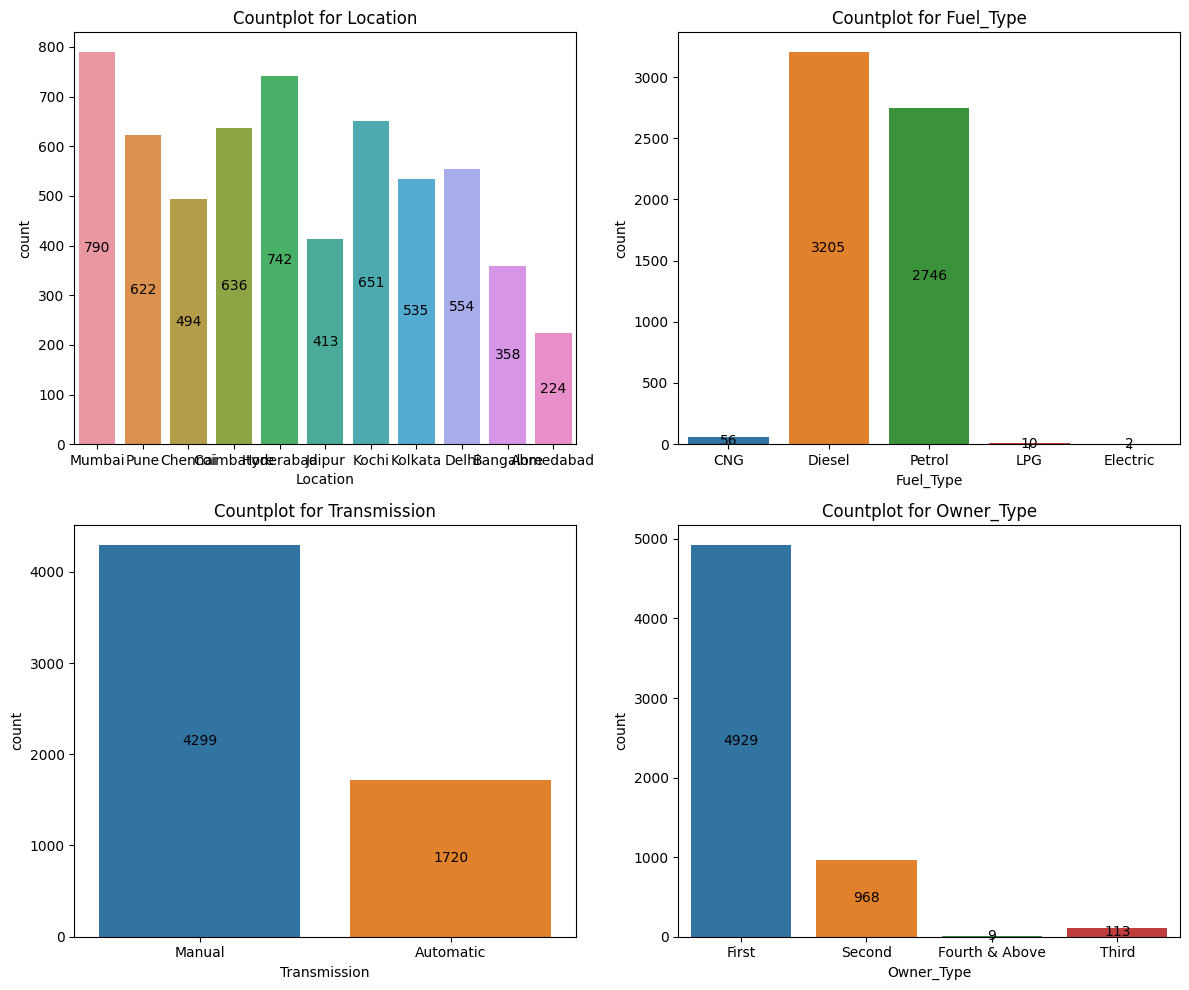

In [170]:
cols = ['Location', 'Fuel_Type', 'Transmission', 'Owner_Type']

plt.figure(figsize=(12,10))
for i in range(len(cols)):
    plt.subplot(2,2,i+1)
    ax =sns.countplot(x=train[cols[i]])
    ax.bar_label(ax.containers[0],label_type='center')
    plt.title(f'Countplot for {cols[i]}')

plt.tight_layout()
plt.show()

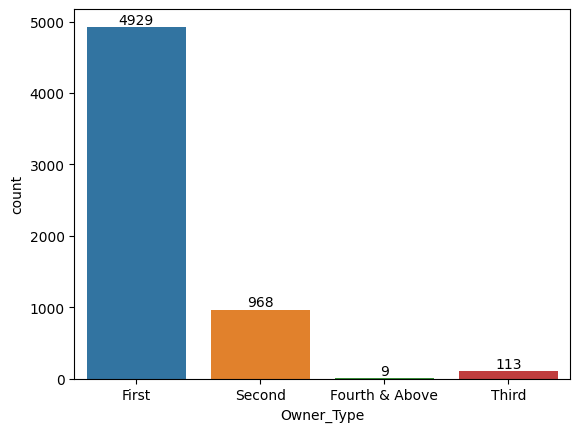

In [162]:
ax = sns.countplot(x=train['Owner_Type'])
ax.bar_label(ax.containers[0])
plt.show()

In [165]:
for i in ax.containers[0]:
    print(i)

Rectangle(xy=(-0.4, 0), width=0.8, height=4929, angle=0)
Rectangle(xy=(0.6, 0), width=0.8, height=968, angle=0)
Rectangle(xy=(1.6, 0), width=0.8, height=9, angle=0)
Rectangle(xy=(2.6, 0), width=0.8, height=113, angle=0)


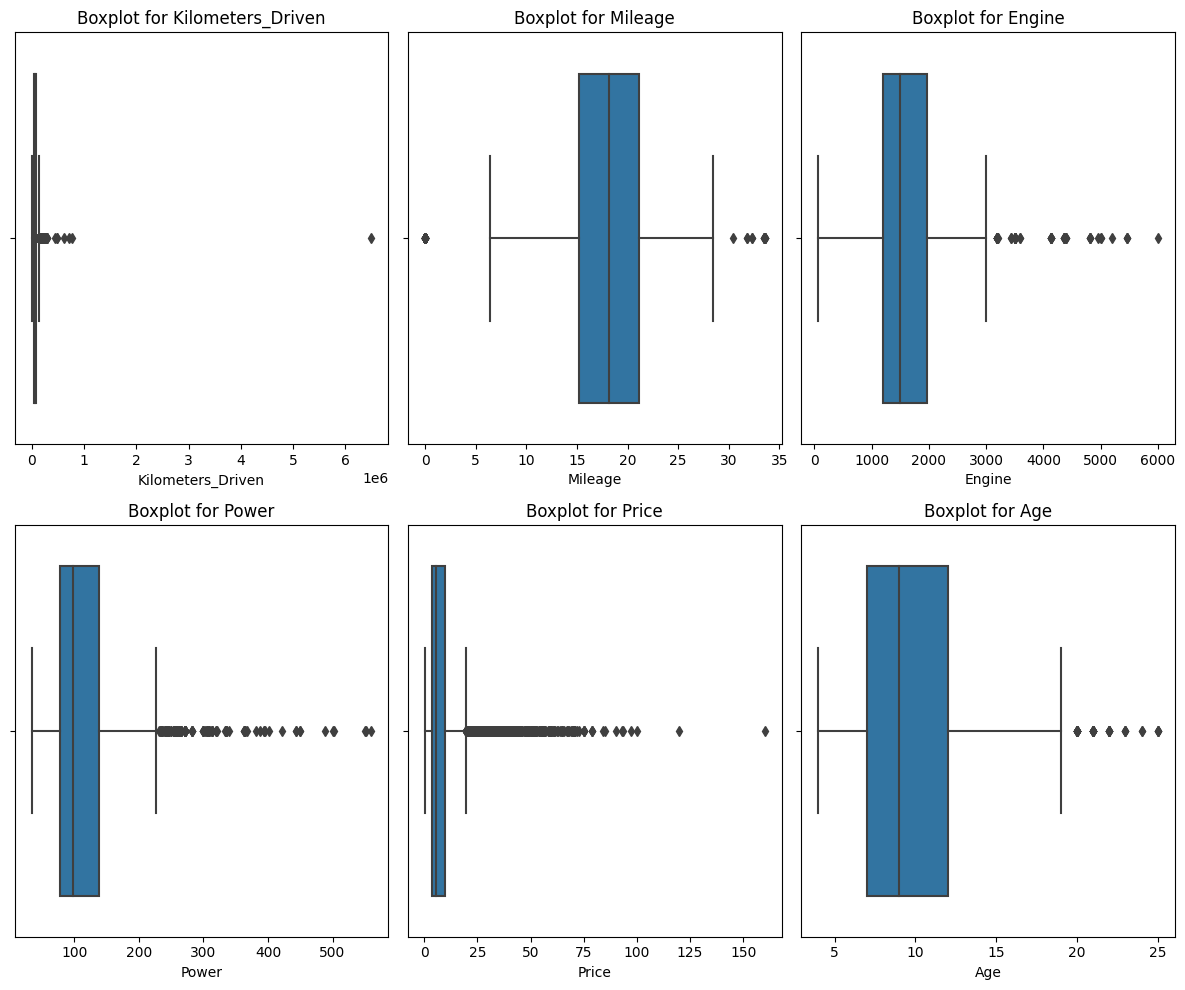

In [172]:
cols = ['Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Price', 'Age']
plt.figure(figsize=(12,10))
for i in range(len(cols)):
    plt.subplot(2,3,i+1)
    ax =sns.boxplot(x=train[cols[i]])
#     ax.bar_label(ax.containers[0],label_type='center')
    plt.title(f'Boxplot for {cols[i]}')

plt.tight_layout()
plt.show()

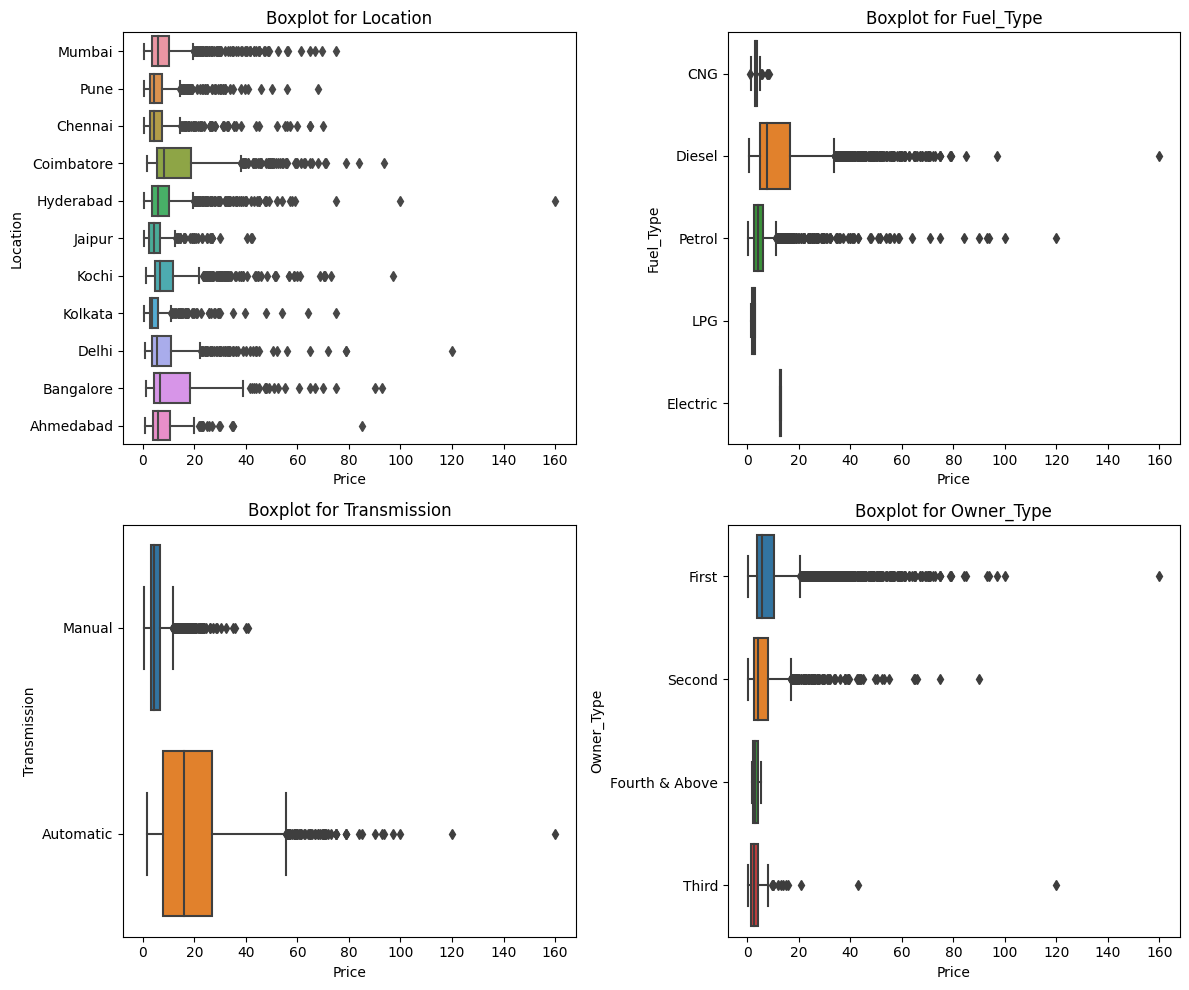

In [175]:
cols = ['Location', 'Fuel_Type', 'Transmission', 'Owner_Type']

plt.figure(figsize=(12,10))
for i in range(len(cols)):
    plt.subplot(2,2,i+1)
    sns.boxplot(y=train[cols[i]],x=train['Price'])
    plt.title(f'Boxplot for {cols[i]}')
plt.tight_layout()
plt.show()

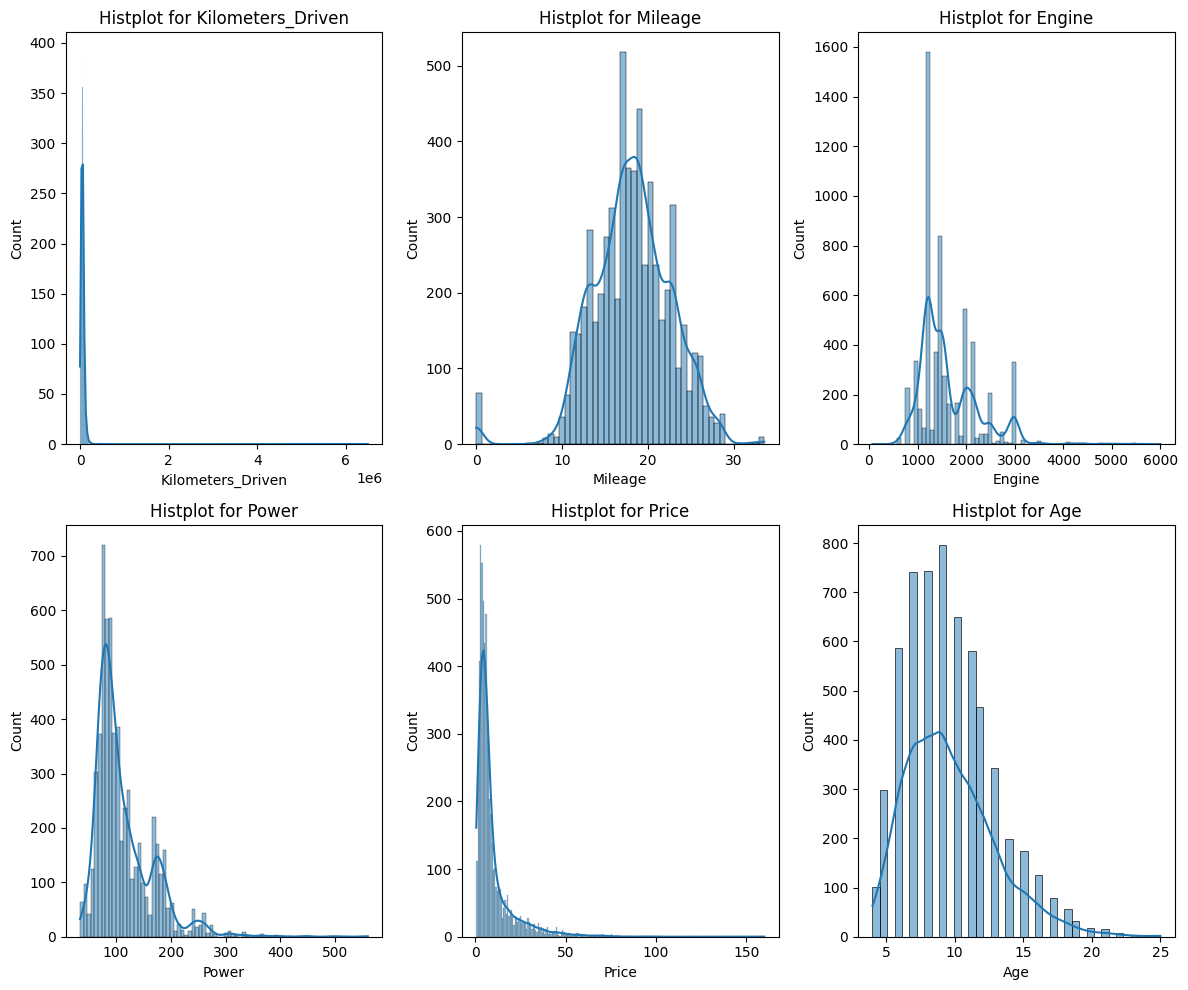

In [176]:
cols = ['Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Price', 'Age']
plt.figure(figsize=(12,10))
for i in range(len(cols)):
    plt.subplot(2,3,i+1)
    sns.histplot(x=train[cols[i]],kde=True)
    plt.title(f'Histplot for {cols[i]}')
    
plt.tight_layout()
plt.show()

#### EDA - Insights - Analysis

1) Plot Top N Brand wise highest Avg Price<br>
2) Plot Year wise Avg Price in descending order<br>
3) Rank top 3 Brand per Fuel Type with highest mean Price. Also display the corresponding Car_Brand.<br>
4) Rank top N Car_Brand per location based on the Count of Car Brand<br>
5) Find Car_Model wise Avg Price representing only those Car_Models whose avg_price is greater
than avg price of overall average of Car_Model wise Avg Price<br>

In [177]:
# FType    Brand   Mean_Price
# Diesel   Maruti     10
# Diesel   LandRover   8
# Diesel   MiniCooper  6
# Petrol   Maruti     10
# Petrol   LandRover   8
# Petrol   MiniCooper  6


#### Q3) Rank top 3 Brand per Fuel Type with highest mean Price. Also display the corresponding Car_Brand.

In [183]:
q3 = train.groupby(['Fuel_Type','Brand'])['Price'].mean().reset_index()
q3.head()

,Fuel_Type,Brand,Price
0,CNG,Hyundai,3.262500
1,CNG,Maruti,3.551837
2,CNG,Tata,3.250000
3,CNG,Toyota,3.350000
4,Diesel,Ambassador,1.350000


In [185]:
q3 = q3.sort_values(['Fuel_Type','Price'],ascending=[True,False])
q3.head()

,Fuel_Type,Brand,Price
1,CNG,Maruti,3.551837
3,CNG,Toyota,3.350000
0,CNG,Hyundai,3.262500
2,CNG,Tata,3.250000
23,Diesel,Porsche,57.440000


In [187]:
q3['Rank'] = q3.groupby(['Fuel_Type']).cumcount() + 1
q3.head(10)

,Fuel_Type,Brand,Price,Rank
1,CNG,Maruti,3.551837,1
3,CNG,Toyota,3.350000,2
0,CNG,Hyundai,3.262500,3
2,CNG,Tata,3.250000,4
23,Diesel,Porsche,57.440000,1
16,Diesel,LandRover,39.232034,2
14,Diesel,Jaguar,34.586944,3
19,Diesel,Mercedes-Benz,28.775941,4
5,Diesel,Audi,25.834608,5
6,Diesel,BMW,25.597657,6


In [189]:
top3_per_fuel_type = q3[q3['Rank']<=3]
top3_per_fuel_type.index = list(range(len(top3_per_fuel_type)))
top3_per_fuel_type

,Fuel_Type,Brand,Price,Rank
0,CNG,Maruti,3.551837,1
1,CNG,Toyota,3.350000,2
2,CNG,Hyundai,3.262500,3
3,Diesel,Porsche,57.440000,1
4,Diesel,LandRover,39.232034,2
5,Diesel,Jaguar,34.586944,3
6,Electric,Mahindra,13.000000,1
7,Electric,Toyota,12.750000,2
8,LPG,Hyundai,2.630000,1
9,LPG,Maruti,2.344000,2


### Q4) Rank top N Car_Brand per location based on the Count of Car Brand

In [197]:
n = 4
q4 = train.groupby(['Location','Brand'])['Brand'].count().reset_index(name='Count')
q4 = q4.sort_values(['Location','Count'],ascending=[True,False])
q4.groupby('Location').head(n)

,Location,Brand,Count
8,Ahmedabad,Maruti,50
5,Ahmedabad,Hyundai,48
4,Ahmedabad,Honda,27
15,Ahmedabad,Toyota,18
24,Bangalore,Hyundai,82
29,Bangalore,Mercedes-Benz,34
18,Bangalore,Audi,32
28,Bangalore,Maruti,32
53,Chennai,Maruti,97
49,Chennai,Hyundai,79


### Q6) Find Brand wise Price of Cars where Car Price is greater than Avg Price for that Brand

In [199]:
train.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'Price', 'Brand', 'Model', 'Age'],
      dtype='object')

In [203]:
s1 = train.groupby(['Brand'])['Price'].mean().reset_index()
s1.columns = ['Brand','AvgPrice']
s1.head()

,Brand,AvgPrice
0,Ambassador,1.350000
1,Audi,25.537712
2,BMW,25.243146
3,Bentley,59.000000
4,Chevrolet,3.044463


In [208]:
s2 = pd.merge(train,s1,on='Brand')
s2 = s2[['Brand','Price','AvgPrice','Name','Year','Fuel_Type','Location']]
res = s2[s2['Price']>s2['AvgPrice']]
res

,Brand,Price,AvgPrice,Name,Year,Fuel_Type,Location
1,Maruti,6.00,4.517267,Maruti Ertiga VDI,2012,Diesel,Chennai
2,Maruti,9.95,4.517267,Maruti Ciaz Zeta,2018,Petrol,Kochi
3,Maruti,5.60,4.517267,Maruti Swift VDI BSIV,2015,Diesel,Jaipur
4,Maruti,5.99,4.517267,Maruti Swift DDiS VDI,2017,Diesel,Jaipur
5,Maruti,8.25,4.517267,Maruti S Cross DDiS 200 Alpha,2015,Diesel,Bangalore
...,...,...,...,...,...,...,...
6005,Jeep,20.00,18.718667,Jeep Compass 2.0 Limited Option 4X4,2017,Diesel,Jaipur
6006,Jeep,19.46,18.718667,Jeep Compass 2.0 Longitude,2018,Diesel,Kochi
6011,Isuzu,20.00,14.696667,Isuzu MUX 4WD,2017,Diesel,Jaipur
6012,Isuzu,16.09,14.696667,ISUZU D-MAX V-Cross 4X4,2018,Diesel,Coimbatore


In [210]:
res1 = res.sort_values(['Brand','Price'],ascending=[True,False])
res1.groupby('Brand').head(3)

,Brand,Price,AvgPrice,Name,Year,Fuel_Type,Location
2995,Audi,72.94,25.537712,Audi Q7 45 TDI Quattro Premium Plus,2019,Diesel,Kochi
2940,Audi,70.36,25.537712,Audi Q7 3.0 TDI Quattro Technology,2018,Diesel,Kochi
3127,Audi,68.00,25.537712,Audi Q7 45 TDI Quattro Technology,2017,Diesel,Pune
4803,BMW,93.67,25.243146,BMW 7 Series 740Li,2018,Petrol,Coimbatore
4804,BMW,93.00,25.243146,BMW 7 Series 740Li,2017,Petrol,Bangalore
...,...,...,...,...,...,...,...
3818,Volkswagen,16.80,5.307270,Volkswagen Jetta 2012-2014 1.4 TSI,2018,Petrol,Coimbatore
3728,Volkswagen,15.95,5.307270,Volkswagen Beetle 2.0,2009,Petrol,Mumbai
5639,Volvo,32.50,18.802857,Volvo XC60 D5,2015,Diesel,Hyderabad
5630,Volvo,25.00,18.802857,Volvo S60 D4 Momentum,2015,Diesel,Hyderabad


In [ ]:
### Outlier Treatment
### Corr => Feature Selection => RFE, wrapper methods
### Encoding
### x and y
#### train and test split


#### Outlier Treatment

In [211]:
num_cols

Index(['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats',
       'Price', 'Age'],
      dtype='object')

In [213]:
train[['Kilometers_Driven', 'Mileage', 'Engine', 'Power','Price', 'Age']].describe(percentiles=[0.01,0.02,0.98,0.99]).T

,count,mean,std,min,1%,2%,50%,98%,99%,max
Kilometers_Driven,6019.0,58738.380296,91268.843206,171.00,4037.44,7272.0,53000.00,150000.0000,172829.00,6500000.00
Mileage,6019.0,18.134966,4.581528,0.00,0.00,10.0,18.15,26.8300,28.09,33.54
Engine,6019.0,1620.509221,599.635458,72.00,796.00,796.0,1493.00,2993.0000,3161.36,5998.00
Power,6019.0,112.883539,53.283701,34.20,40.30,47.3,97.70,258.0000,282.00,560.00
Price,6019.0,9.479468,11.187917,0.44,0.90,1.2,5.64,45.6164,56.00,160.00
Age,6019.0,9.641801,3.269742,4.00,4.00,5.0,9.00,18.0000,19.00,25.00


In [214]:
def outlier_treatment(x):
    x = x.clip(upper=x.quantile(0.99))
    x = x.clip(lower=x.quantile(0.01))
    return x

In [215]:
train1 = train.copy()

In [216]:
cols = ['Kilometers_Driven', 'Mileage', 'Engine', 'Power','Price', 'Age']

train[cols] = train[cols].apply(outlier_treatment)

In [217]:
train[['Kilometers_Driven', 'Mileage', 'Engine', 'Power','Price', 'Age']].describe(percentiles=[0.01,0.02,0.98,0.99]).T

,count,mean,std,min,1%,2%,50%,98%,99%,max
Kilometers_Driven,6019.0,56951.095837,32431.693099,4037.44,4053.3808,7272.0,53000.00,150000.0000,172688.7800,172829.00
Mileage,6019.0,18.121814,4.546727,0.00,0.0000,10.0,18.15,26.8300,28.0900,28.09
Engine,6019.0,1613.467845,567.432145,796.00,796.0000,796.0,1493.00,2993.0000,3132.1352,3161.36
Power,6019.0,112.144697,49.599517,40.30,40.3000,47.3,97.70,258.0000,282.0000,282.00
Price,6019.0,9.330555,10.293647,0.90,0.9000,1.2,5.64,45.6164,56.0000,56.00
Age,6019.0,9.621698,3.201072,4.00,4.0000,5.0,9.00,18.0000,19.0000,19.00


#### Encoding

In [218]:
for i in cat_cols:
    print(f'{i}',train[i].nunique())

Name 1876
Location 11
Fuel_Type 5
Transmission 2
Owner_Type 4
Brand 30
Model 212


In [220]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

In [223]:
set(test['Brand'].unique()).difference(set(train['Brand'].unique()))

set()

In [222]:
train['Brand'] = lb.fit_transform(train['Brand'])
test['Brand'] = lb.transform(test['Brand'])

In [225]:
train_dum = pd.get_dummies(train,columns=['Location','Fuel_Type',
                                          'Transmission','Owner_Type'],drop_first=True)
print(train_dum.shape)
train_dum.columns

(6019, 29)


Index(['Name', 'Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power',
       'Seats', 'Price', 'Brand', 'Model', 'Age', 'Location_Bangalore',
       'Location_Chennai', 'Location_Coimbatore', 'Location_Delhi',
       'Location_Hyderabad', 'Location_Jaipur', 'Location_Kochi',
       'Location_Kolkata', 'Location_Mumbai', 'Location_Pune',
       'Fuel_Type_Diesel', 'Fuel_Type_Electric', 'Fuel_Type_LPG',
       'Fuel_Type_Petrol', 'Transmission_Manual', 'Owner_Type_Fourth & Above',
       'Owner_Type_Second', 'Owner_Type_Third'],
      dtype='object')

In [226]:
test_dum = pd.get_dummies(test,columns=['Location','Fuel_Type',
                                          'Transmission','Owner_Type'],drop_first=True)
print(test_dum.shape)
test_dum.columns

(1232, 27)


Index(['Name', 'Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power',
       'Seats', 'Brand', 'Model', 'Age', 'Location_Bangalore',
       'Location_Chennai', 'Location_Coimbatore', 'Location_Delhi',
       'Location_Hyderabad', 'Location_Jaipur', 'Location_Kochi',
       'Location_Kolkata', 'Location_Mumbai', 'Location_Pune',
       'Fuel_Type_Diesel', 'Fuel_Type_LPG', 'Fuel_Type_Petrol',
       'Transmission_Manual', 'Owner_Type_Fourth & Above', 'Owner_Type_Second',
       'Owner_Type_Third'],
      dtype='object')

In [329]:
x = train_dum.drop(['Price','Name','Year','Model','Fuel_Type_Electric'],axis=1)
y = train_dum['Price']
y1 = train_dum['Price']
print(x.shape)
print(y.shape)
print(y1.shape)

(6019, 24)
(6019,)
(6019,)


In [330]:
x.dtypes.value_counts()

uint8      17
float64     5
int32       1
int64       1
dtype: int64

In [331]:
train.shape

(6019, 15)

In [332]:
from scipy.stats import jarque_bera,shapiro
# Ho : data is normally dist => p>0.05
# H1 : data is not normally dist => p<=0.05

In [333]:
print(jarque_bera(train['Price']))
print(jarque_bera(np.log(train['Price'])))

SignificanceResult(statistic=16912.52255705065, pvalue=0.0)
SignificanceResult(statistic=182.35179351353088, pvalue=2.5281984221940202e-40)


In [334]:
from sklearn.model_selection import train_test_split

In [335]:
x_train,x_test, y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4213, 24)
(1806, 24)
(4213,)
(1806,)


In [336]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

In [337]:
from sklearn import ensemble
print(list(dir(ensemble)))

['AdaBoostClassifier', 'AdaBoostRegressor', 'BaggingClassifier', 'BaggingRegressor', 'BaseEnsemble', 'ExtraTreesClassifier', 'ExtraTreesRegressor', 'GradientBoostingClassifier', 'GradientBoostingRegressor', 'HistGradientBoostingClassifier', 'HistGradientBoostingRegressor', 'IsolationForest', 'RandomForestClassifier', 'RandomForestRegressor', 'RandomTreesEmbedding', 'StackingClassifier', 'StackingRegressor', 'VotingClassifier', 'VotingRegressor', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '_bagging', '_base', '_forest', '_gb', '_gb_losses', '_gradient_boosting', '_hist_gradient_boosting', '_iforest', '_stacking', '_voting', '_weight_boosting']


In [338]:
from sklearn.metrics import *

In [339]:
def eval_model(ytest,ypred):
    mae = mean_absolute_error(ytest,ypred)
    mse = mean_squared_error(ytest,ypred)
    rmse = mean_squared_error(ytest,ypred,squared=False)
    return {'MAE':mae,'MSE':mse,'RMSE':rmse}

def model_res(model,x_train,x_test,y_train,y_test,ypred,mname):
    train_r2 = model.score(x_train,y_train)
    test_r2 = model.score(x_test,y_test)
    w = eval_model(y_test,ypred)
    res_metrics = {'Train_R2':train_r2,'Test_R2':test_r2,'Test_MSE':w['MSE'],
                    'Test_RMSE':w['RMSE'],'Test_MAE':w['MAE']}
    res = pd.DataFrame(res_metrics, index=[mname]) 
    return res

#### 1) Linear Regression

In [340]:
lr1 = LinearRegression()
lr1.fit(x_train,y_train)
ypred_lr1 = lr1.predict(x_test)

In [341]:
lr1_df = model_res(lr1,x_train,x_test,y_train,y_test,ypred_lr1,'Lin_Reg1')
lr1_df

,Train_R2,Test_R2,Test_MSE,Test_RMSE,Test_MAE
Lin_Reg1,0.751566,0.736931,29.015032,5.38656,3.583117


#### 2) Ridge

In [342]:
# RidgeCV
rid1 = Ridge(alpha=14.5)
rid1.fit(x_train,y_train)
ypred_rid1 = rid1.predict(x_test)

In [343]:
rid1_df = model_res(rid1,x_train,x_test,y_train,y_test,ypred_rid1,'Ridge')
rid1_df

,Train_R2,Test_R2,Test_MSE,Test_RMSE,Test_MAE
Ridge,0.751388,0.736867,29.022009,5.387208,3.582014


#### 2) DT

In [344]:
dt1 = DecisionTreeRegressor(max_depth=8,min_samples_split=10)
dt1.fit(x_train,y_train)
ypred_dt1 =dt1.predict(x_test)

In [345]:
dt1_df = model_res(dt1,x_train,x_test,y_train,y_test,ypred_dt1,'DTree1')
dt1_df

,Train_R2,Test_R2,Test_MSE,Test_RMSE,Test_MAE
DTree1,0.943345,0.855882,15.895344,3.986897,1.978655


#### 4) RandomForest

In [346]:
rf1 = RandomForestRegressor(n_estimators=100,max_depth=7,min_samples_split=10,
                            min_samples_leaf=15,random_state=1)
rf1.fit(x_train,y_train)
ypred_rf1  = rf1.predict(x_test)

In [347]:
rf1_df = model_res(rf1,x_train,x_test,y_train,y_test,ypred_rf1,'RForest1')
rf1_df

,Train_R2,Test_R2,Test_MSE,Test_RMSE,Test_MAE
RForest1,0.90524,0.866306,14.745724,3.840016,1.950801


#### 5) KNN Regressor

In [348]:
knn1 = KNeighborsRegressor(n_neighbors=7)
knn1.fit(x_train,y_train)
ypred_knn1  = knn1.predict(x_test)

In [349]:
knn1_res = model_res(knn1,x_train,x_test,y_train,y_test,ypred_knn1,'KNN')
knn1_res

,Train_R2,Test_R2,Test_MSE,Test_RMSE,Test_MAE
KNN,0.692898,0.56089,48.431266,6.959258,4.046853


#### 6) AdaBoost Regression

In [350]:
ada1 = AdaBoostRegressor(n_estimators=30)
ada1.fit(x_train,y_train)
ypred_ada1 = ada1.predict(x_test)

In [351]:
ada1_df = model_res(ada1,x_train,x_test,y_train,y_test,ypred_ada1,'AdaBoost_Reg')
ada1_df

,Train_R2,Test_R2,Test_MSE,Test_RMSE,Test_MAE
AdaBoost_Reg,0.767502,0.748305,27.760449,5.268819,4.156834


#### 7) XGBoost

In [352]:
xgb1 = XGBRegressor(alpha=0.5,gamma=0.8,eta=0.3,max_depth=5)
xgb1.fit(x_train,y_train)
ypred_xgb1 = xgb1.predict(x_test)

In [353]:
xgb1_res = model_res(xgb1,x_train,x_test,y_train,y_test,ypred_xgb1,'XGboost_Reg')
xgb1_res

,Train_R2,Test_R2,Test_MSE,Test_RMSE,Test_MAE
XGboost_Reg,0.992585,0.918569,8.981331,2.996887,1.339071


In [354]:
all_res = pd.concat([lr1_df,rid1_df,knn1_res,dt1_df,rf1_df,ada1_df,xgb1_res])
all_res

,Train_R2,Test_R2,Test_MSE,Test_RMSE,Test_MAE
Lin_Reg1,0.751566,0.736931,29.015032,5.386560,3.583117
Ridge,0.751388,0.736867,29.022009,5.387208,3.582014
KNN,0.692898,0.560890,48.431266,6.959258,4.046853
DTree1,0.943345,0.855882,15.895344,3.986897,1.978655
RForest1,0.905240,0.866306,14.745724,3.840016,1.950801
AdaBoost_Reg,0.767502,0.748305,27.760449,5.268819,4.156834
XGboost_Reg,0.992585,0.918569,8.981331,2.996887,1.339071


#### Final Model => XGBoost

In [355]:
xgb_final_model = XGBRegressor(alpha=0.5,gamma=0.8,eta=0.3,max_depth=5)
xgb_final_model.fit(x,y)

XGBRegressor(alpha=0.5, base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False, eta=0.3,
             eval_metric=None, feature_types=None, gamma=0.8, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=5, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, ...)

In [356]:
print(test_dum.columns)
print(train_dum.columns)

Index(['Name', 'Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power',
       'Seats', 'Brand', 'Model', 'Age', 'Location_Bangalore',
       'Location_Chennai', 'Location_Coimbatore', 'Location_Delhi',
       'Location_Hyderabad', 'Location_Jaipur', 'Location_Kochi',
       'Location_Kolkata', 'Location_Mumbai', 'Location_Pune',
       'Fuel_Type_Diesel', 'Fuel_Type_LPG', 'Fuel_Type_Petrol',
       'Transmission_Manual', 'Owner_Type_Fourth & Above', 'Owner_Type_Second',
       'Owner_Type_Third'],
      dtype='object')
Index(['Name', 'Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power',
       'Seats', 'Price', 'Brand', 'Model', 'Age', 'Location_Bangalore',
       'Location_Chennai', 'Location_Coimbatore', 'Location_Delhi',
       'Location_Hyderabad', 'Location_Jaipur', 'Location_Kochi',
       'Location_Kolkata', 'Location_Mumbai', 'Location_Pune',
       'Fuel_Type_Diesel', 'Fuel_Type_Electric', 'Fuel_Type_LPG',
       'Fuel_Type_Petrol', 'Transmission_Manual', 'Owner_Type_F

In [357]:
print(test_dum.shape)
print(train_dum.shape)

(1232, 27)
(6019, 29)


In [358]:
set(train_dum.columns).difference(set(test_dum.columns))

{'Fuel_Type_Electric', 'Price'}

In [360]:
test_data = test_dum.drop(['Name','Year','Model'],axis=1)
print(test_data.shape)
print(x.shape,x_train.shape)

(1232, 24)
(6019, 24) (4213, 24)


In [363]:
ypred_test = xgb_final_model.predict(test_data)
ypred_test[:10]

array([ 2.8760695,  3.2968032, 17.326271 ,  4.6998277,  4.6016507,
       11.592069 , 21.234491 ,  2.6265032,  3.3756895, 11.883431 ],
      dtype=float32)

In [364]:
submission = pd.DataFrame({'ID':list(range(len(ypred_test))),'Prediction':ypred_test})
submission.head()

,ID,Prediction
0,0,2.876070
1,1,3.296803
2,2,17.326271
3,3,4.699828
4,4,4.601651
